In [16]:
data(iris)
head(iris, 10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [17]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

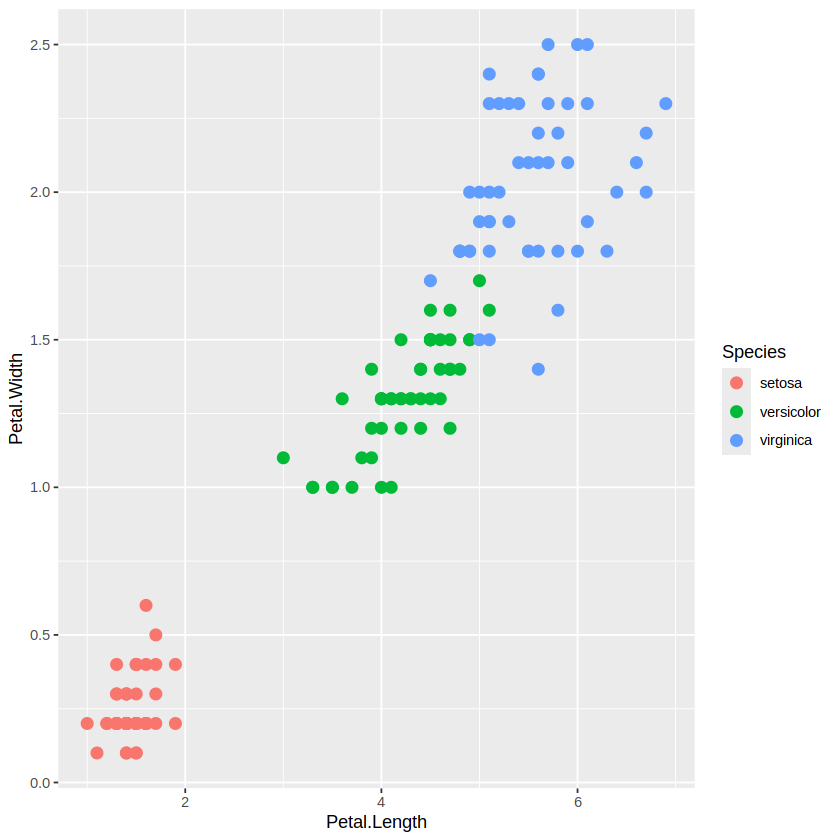

In [18]:
library(ggplot2)

options(repr.plot.width=7)

p <- ggplot(iris, aes(Petal.Length, Petal.Width, color=Species, shpae=Species))
p + geom_point(size=3)

In [19]:
petal <- iris[3:5]
head(petal, 10)

,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<fct>
1,1.4,0.2,setosa
2,1.4,0.2,setosa
3,1.3,0.2,setosa
4,1.5,0.2,setosa
5,1.4,0.2,setosa
6,1.7,0.4,setosa
7,1.4,0.3,setosa
8,1.5,0.2,setosa
9,1.4,0.2,setosa


In [20]:
petal.kmeans <- kmeans(petal[1:2], centers=3, iter.max=1000)
petal.kmeans

K-means clustering with 3 clusters of sizes 52, 48, 50

Cluster means:
  Petal.Length Petal.Width
1     4.269231    1.342308
2     5.595833    2.037500
3     1.462000    0.246000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
[112] 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
[149] 2 2

Within cluster sum of squares by cluster:
[1] 13.05769 16.29167  2.02200
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [21]:
class(petal.kmeans) # output은 kmean타입

[1] "kmeans"

In [22]:
petal.kmeans$size

[1] 52 48 50

In [23]:
centers <- as.data.frame(petal.kmeans$centers)
centers

,Petal.Length,Petal.Width
,<dbl>,<dbl>
1,4.269231,1.342308
2,5.595833,2.037500
3,1.462000,0.246000


In [24]:
petal$cluster <- petal.kmeans$cluster
petal[120:130, ]

,Petal.Length,Petal.Width,Species,cluster
,<dbl>,<dbl>,<fct>,<int>
120,5.0,1.5,virginica,1
121,5.7,2.3,virginica,2
122,4.9,2.0,virginica,2
123,6.7,2.0,virginica,2
124,4.9,1.8,virginica,2
125,5.7,2.1,virginica,2
126,6.0,1.8,virginica,2
127,4.8,1.8,virginica,1
128,4.9,1.8,virginica,2


In [25]:
table(petal$Species, petal$cluster)

            
              1  2  3
  setosa      0  0 50
  versicolor 48  2  0
  virginica   4 46  0

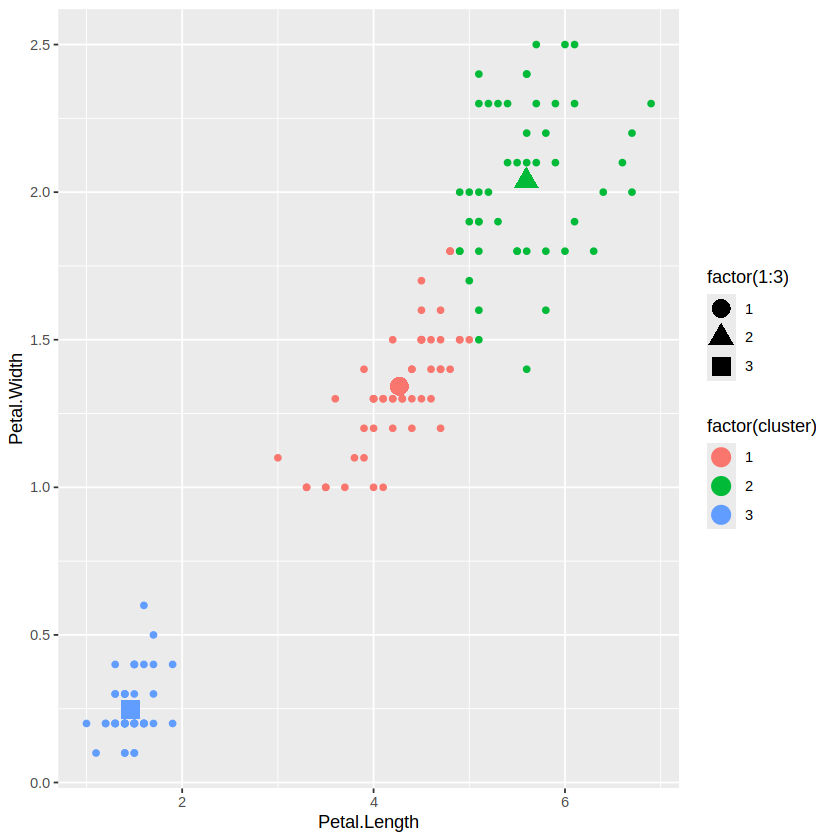

In [26]:
p <- ggplot(petal, aes(Petal.Length, Petal.Width)) 
p <- p + geom_point(aes(color = factor(cluster))) 
p + geom_point(data = centers, aes(x = Petal.Length, y = Petal.Width, 
                                    color = factor(1:3), shape = factor(1:3)), size = 5)

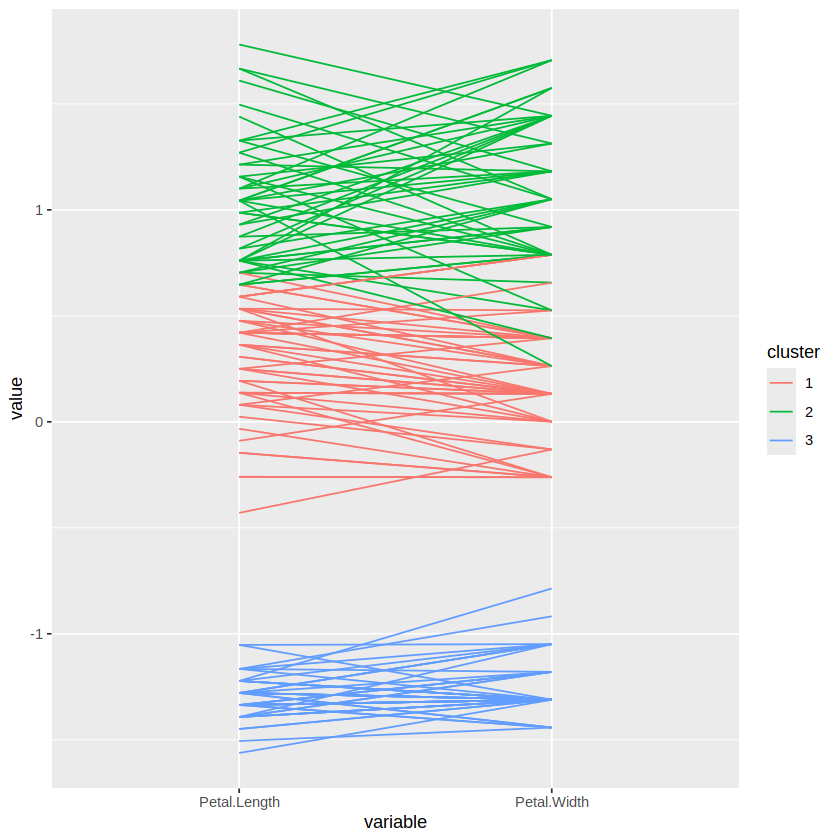

In [27]:
library(GGally)

petal$cluster <- as.factor(petal$cluster)

p <- ggparcoord(data = petal, 
                columns = c(1:2), 
                groupColumn = 'cluster', 
                scale = 'std')
p

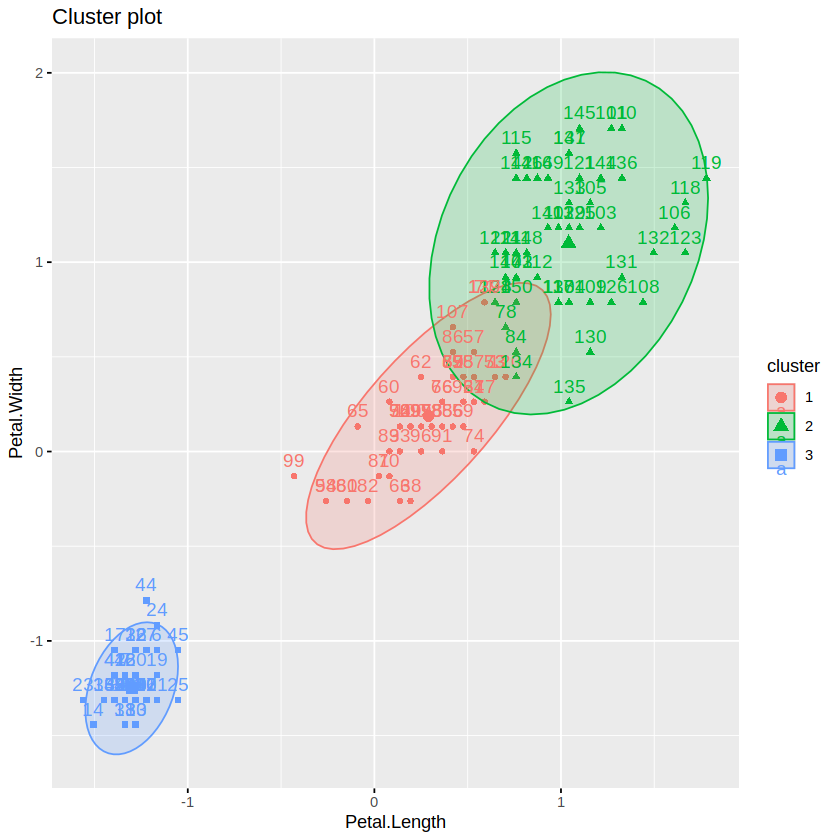

In [28]:
library(factoextra)

fviz_cluster(petal.kmeans, petal[1:2], ellipse.type="norm")

In [29]:
library(rpart)
r <- rpart(Species ~ ., data=iris)
r

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *

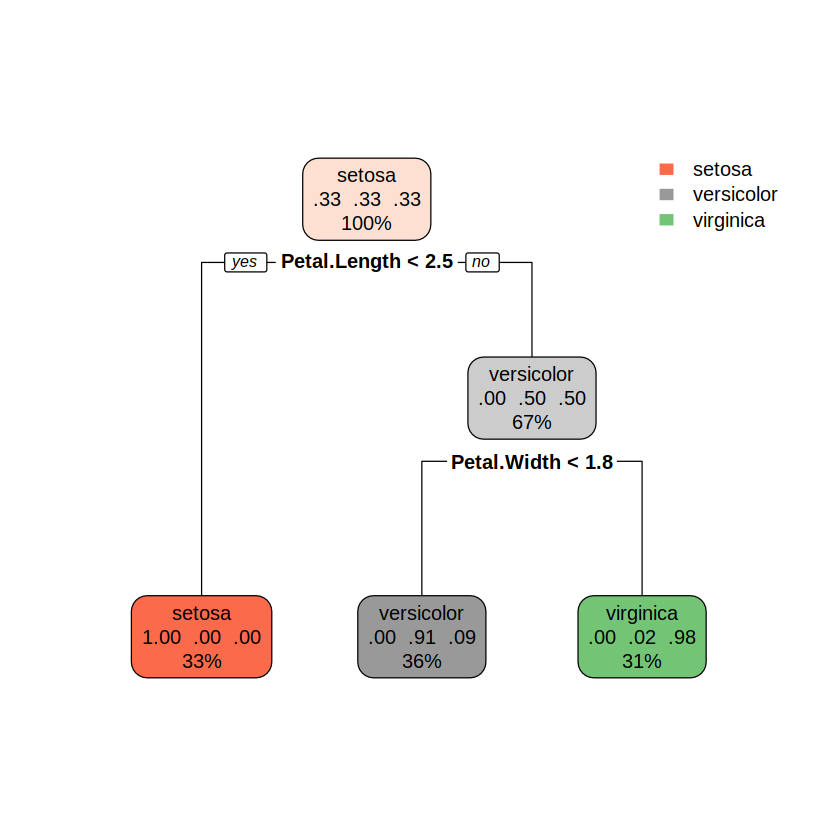

In [31]:
library(rpart.plot)

rpart.plot(r)

In [32]:
newdata <- iris[sample(1:150, 10), ]
newdata

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
138,6.4,3.1,5.5,1.8,virginica
41,5.0,3.5,1.3,0.3,setosa
93,5.8,2.6,4.0,1.2,versicolor
91,5.5,2.6,4.4,1.2,versicolor
118,7.7,3.8,6.7,2.2,virginica
77,6.8,2.8,4.8,1.4,versicolor
72,6.1,2.8,4.0,1.3,versicolor
124,6.3,2.7,4.9,1.8,virginica
92,6.1,3.0,4.6,1.4,versicolor


In [33]:
predict <- predict(r, newdata[1:4])
predict <- as.data.frame(predict)
cbind(predict, newdata$Species)

,setosa,versicolor,virginica,newdata$Species
,<dbl>,<dbl>,<dbl>,<fct>
138,0,0.02173913,0.97826087,virginica
41,1,0.00000000,0.00000000,setosa
93,0,0.90740741,0.09259259,versicolor
91,0,0.90740741,0.09259259,versicolor
118,0,0.02173913,0.97826087,virginica
77,0,0.90740741,0.09259259,versicolor
72,0,0.90740741,0.09259259,versicolor
124,0,0.02173913,0.97826087,virginica
92,0,0.90740741,0.09259259,versicolor


In [34]:
p <- predict(r, newdata[1:4], type='class')
as.data.frame(p)

,p
,<fct>
138,virginica
41,setosa
93,versicolor
91,versicolor
118,virginica
77,versicolor
72,versicolor
124,virginica
92,versicolor


In [35]:
table(p, newdata$Species)

            
p            setosa versicolor virginica
  setosa          2          0         0
  versicolor      0          5         0
  virginica       0          0         3